#  Clustering with Dimensionality Reduction
## PCA

In this notebook, you will implement PCA clustering with dimensionality reduction. In general, you will learn how to:

* Implement the PCA clustering algorithms using scikit learn library ;

* Implement the PCA clustering algorithms from scratch .

* Implement the K-means algorithm in task 5.13 by applying PCA to data

In particular, you will be asked to to:
* Implement function 'PCANewPredict';

# Import libraries

First of all, import the libraries you need to use in this notebook. 

In [1]:
# import libraries
import pickle
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score
from copy import deepcopy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


# Load the data
For the clustering tasks we will use the dataset generating from isotropic Gaussian blobs for clustering. Specifically, we will generate 3000 gaussian datapoints in 2-D space. They come from 4 clusters.

In [2]:
X1, Y1 = make_blobs(n_samples=3000, centers=4, n_features=3,random_state=0)

dataset shape: (3000, 3)


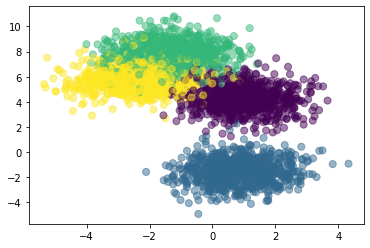

In [3]:
# visualise the data
print("dataset shape:" ,X1.shape)
#  plot datapoints according to their cluster labels
plt.scatter(X1[:, 0], X1[:, 1], c=Y1, s=50, alpha=0.5, cmap='viridis')

#  plot true cluster centers using color 'blue'
#plt.scatter(true_centers[:, 0], true_centers[:, 1], c='blue', s=200);

# Use PCA clustering from a library

We will first see how PCA can be implemented using built-in functions from the scikit-learn library.

In [4]:
# sklearn functions implementation
def PCAPredict(X, k):
    '''
    Inputs
        X: dataset;
        k: number of Components.
        
    Return
        SValue: The singular values corresponding to each of the selected components.
        Variance: The amount of variance explained by each of the selected components.
                It will provide you with the amount of information or variance each principal component holds after projecting the data to a lower dimensional subspace.
        Vcomp: The estimated number of components.
    '''
    
    # the bulit-in function for PCA,
    # where n_clusters is the number of clusters.
    pca = PCA(n_components=k)
    
    # fit the algorithm with dataset
    pca.fit_transform(X)
    
    Variance = pca.explained_variance_ratio_
    SValue = pca.singular_values_
    Vcomp = pca.components_
    return SValue, Variance, Vcomp

# run PCA for different values of k, which is 3 in following case
k1 = 2
SingularValue, Variance, Vcomponent = PCAPredict(X1,k1)
print(SingularValue)
print(Variance)
print(Vcomponent)

[234.5632008 157.02472  ]
[0.64497992 0.28904302]
[[-0.19176946  0.74597948  0.63776099]
 [-0.29815838  0.57482719 -0.76202052]]


## Implement your own PCA clustering function

In this part, you need to complete the code for function PCANewPredict(X , num_components),
which will implement the PCA algorithm from scratch. To do this, follow these steps:

### 1.Subtract the mean of each variable
Substracting the mean is proved to be helpful.

### 2.Calculate the Covariance Matrix
Calculate the Covariance Matrix of the mean-centered data.

### 3.Compute the Eigenvalues and Eigenvectors
Compute the Eigenvalues and Eigenvectors for the calculated Covariance matrix.

### 4.Sort Eigenvalues in descending order  and select a subset
Sort the Eigenvalues in the descending order along with their corresponding Eigenvector.
Select a subset from the rearranged Eigenvalue matrix.

### 5.Transform the data
Finally, transform the data by having a dot product between the Transpose of the Eigenvector subset and the Transpose of the mean-centered data.

In [5]:
def PCANewPredict(X , num_components):

    #Substract means
    X_meaned = X - np.mean(X , axis = 0)

    #Compute the Covariance  Matrix
    X_cov = np.cov(X_meaned, rowvar=False)
    #Compute Eigen value and vectors
    eigen_values , eigen_vectors = np.linalg.eigh(X_cov)

    #Sort Eigen value and vectors
    sorted_index = np.argsort(eigen_values)[::-1]
    sorted_eigenvalue = eigen_values[sorted_index]
    sorted_eigenvectors = eigen_vectors[:, sorted_index]

    #Choose num_components of first sorted eigenvector
    eigenvector_subset = sorted_eigenvectors[:, 0:num_components]

    #Compute the dimension reduced datapoints
    X_reduced = np.dot(eigenvector_subset.T, X_meaned.T).T

    return X_reduced

# run PCA for different values of k
k2 = 2
Xreduced = PCANewPredict(X1, k2)
print(Xreduced.shape)

(3000, 2)


## visualisation
Now, we will visualise the results, which you can compare with ground truth and the result of built-in functions shown above.

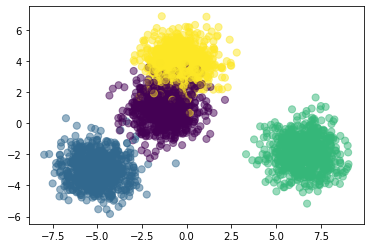

In [6]:
#  plot reduced dimension datapoints by considering PCA
plt.scatter(Xreduced[:, 0], Xreduced[:, 1], c=Y1, s=50, alpha=0.5, cmap='viridis')

# Your Task: Apply your PCA function to the data of Task 5.13 and run K-means again.

In [12]:
X1, y1, true_centers1 = make_blobs(n_samples=3000, centers=3, n_features=5, return_centers=True,
                      random_state=0)

X_reduced1 = PCANewPredict(X1, 2)

kmeans = KMeans(n_clusters=3)
kmeans.fit(X_reduced1)
y_pred1 = kmeans.predict(X_reduced1)
cluster_centers = kmeans.cluster_centers_

acc = accuracy_score(y1, y_pred1)
print(y_pred1)
print(y1)
print(acc)

[0 2 0 ... 0 2 2]
[0 2 0 ... 0 2 2]
1.0


# Congrats!

Now you have seen how to implement PCA using built-in function/ from scratch. You can compare them by changing various parameters such as number of components.